In this experiment we will build a Convolutional Neural Network (CNN) model using Tensorflow to recognize handwritten digits.

A convolutional neural network (CNN, or ConvNet) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other.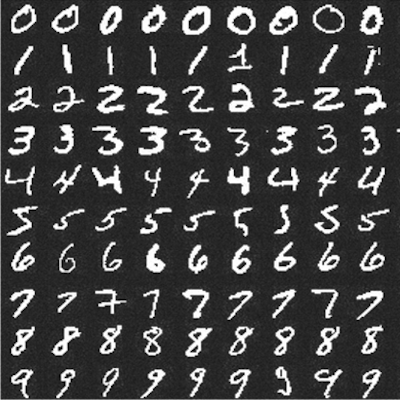


In [2]:
# Selecting Tensorflow version v2 (the command is relevant for Colab only).
%tensorflow_version 2.x

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.7.12
Tensorflow version: 2.8.0
Keras version: 2.8.0


# Load the data
The training dataset consists of 60000 28x28px images of hand-written digits from 0 to 9.

The test dataset consists of 10000 28x28px images.

In [4]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


Normalize the data
Here we're just trying to move from values range of [0...255] to [0...1].

In [6]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


## Explore the data

Here is how each image in the dataset looks like. It is a 28x28 matrix of integers (from `0` to `255`). Each integer represents a color of a pixel.

In [7]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


This matrix of numbers may be drawn as follows

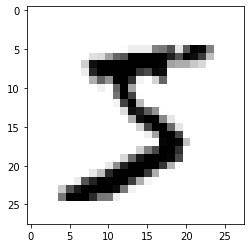

In [8]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [9]:
#numbers_to_display = 25
#num_cells = math.ceil(math.sqrt(numbers_to_display))
#plt.figure(figsize=(10,10))
#for i in range(numbers_to_display):
   # plt.subplot(num_cells, num_cells, i+1)
   # plt.xticks([])
   # plt.yticks([])
   # plt.grid(False)
   # plt.imshow(x_train[i], cmap=plt.cm.binary)
   # plt.xlabel(y_train[i])
#plt.show()

## Reshaping the data

In order to use convolution layers we need to reshape our data and add a color channel to it. As you've noticed currently every digit has a shape of `(28, 28)` which means that it is a 28x28 matrix of color values form `0` to `255`. We need to reshape it to `(28, 28, 1)` shape so that each pixel potentially may have multiple channels (like Red, Green and Blue).

In [10]:
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [11]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


## Normalize the data

Here we're just trying to move from values range of `[0...255]` to `[0...1]`.

In [12]:
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [13]:
# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

## Build the model

We will use [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?version=stable) Keras model.

Then we will have two pairs of [Convolution2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D?version=stable) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D?version=stable) layers. The MaxPooling layer acts as a sort of downsampling using max values in a region instead of averaging.

After that we will use [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten?version=stable) layer to convert multidimensional parameters to vector.

The las layer will be a [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `10` [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax?version=stable) outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is `0`, the 1-st output represents a probability that the input digit is `1` and so on...


In [14]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True). These are all attributes of Dense.

*With  kernel_initializer=tf.keras.initializers.VarianceScaling(), samples are drawn from  normal distribution with a mean of zero and a standard deviation*

*Dropout is one of the techniques that reduces overfitting.
This dropout rate is usually 0.5 and dropout can be tuned to produce best results and also improves training speed.*

# Build the model
We will use Sequential Keras model.

Then we will have two pairs of Convolution2D and MaxPooling2D layers. The MaxPooling layer acts as a sort of downsampling using max values in a region instead of averaging.

After that we will use Flatten layer to convert multidimensional parameters to vector.

The last layer will be a Dense layer with 10 Softmax outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is 0, the 1-st output represents a probability that the input digit is 1 and so on...

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

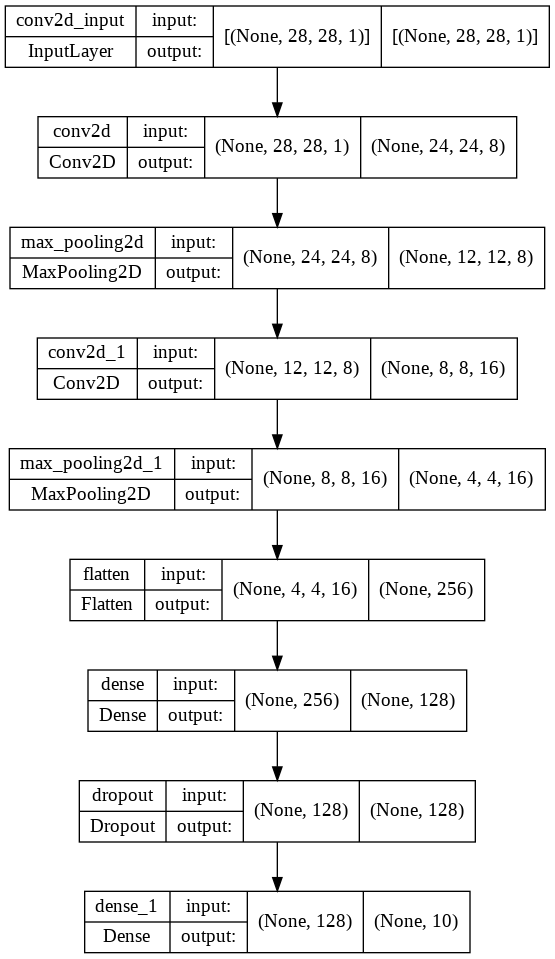

In [16]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

# **Compile the model**

In [17]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

# **Train** **the** **model**

In [18]:
training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test)
)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1895 - accuracy: 0.9426 - val_loss: 0.0527 - val_accuracy: 0.9831
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0645 - accuracy: 0.9797 - val_loss: 0.0377 - val_accuracy: 0.9881
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0490 - accuracy: 0.9848 - val_loss: 0.0339 - val_accuracy: 0.9885
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0382 - accuracy: 0.9880 - val_loss: 0.0328 - val_accuracy: 0.9896
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0309 - accuracy: 0.9901 - val_loss: 0.0295 - val_accuracy: 0.9906
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0273 - accuracy: 0.9914 - val_loss: 0.0248 - val_accuracy: 0.9917
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0223 - accuracy: 0.9925 - val_loss: 0.0287 -

An epoch means training the neural network with all the training data for one cycle. In an epoch, we use all of the data exactly once.

The batch size is a number of samples processed before the model is updated.

The number of epochs is the number of complete passes through the training dataset.
A forward pass and a backward pass together are counted as one pass: An epoch is made up of one or more batches, where we use a part of the dataset to train the neural network.

Finally, let’s make this concrete with a small example.

Assume you have a dataset with 200 samples (rows of data) and you choose a batch size of 5 and 1,000 epochs.

This means that the dataset will be divided into 40 batches, each with five samples. The model weights will be updated after each batch of five samples.

This also means that one epoch will involve 40 batches or 40 updates to the model.

With 1,000 epochs, the model will be exposed to or pass through the whole dataset 1,000 times. That is a total of 40,000 batches during the entire training process.

In [19]:
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

1875/1875 [==============================] - 11s 6ms/step - loss: 0.0073 - accuracy: 0.9974


Same step just without showing output

In [20]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [21]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.00730083929374814
Training accuracy:  0.9974166750907898


Use the model (do predictions)
To use the model that we've just trained for digits recognition we need to call predict() method.

In [22]:
predictions_one_hot = model.predict([x_test_normalized]) 
# prepredictions_one_hot is the name given to the variable

In [23]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


In [28]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,8.751208e-14,2.095848e-10,1.527039e-11,1.130085e-08,1.181891e-09,3.820737e-10,5.357146e-17,1.000000e+00,9.413970e-12,3.771341e-08
1,2.339964e-08,9.575174e-09,1.000000e+00,1.464332e-11,6.460077e-10,3.019246e-15,3.814053e-10,4.199131e-11,2.618991e-12,2.485492e-12
2,3.432094e-10,9.999986e-01,1.762665e-07,5.443390e-10,6.548144e-07,5.328586e-09,1.305338e-07,3.073552e-07,1.250381e-07,4.752323e-09
3,9.999989e-01,2.837743e-16,1.222774e-09,8.658815e-11,8.891653e-11,3.147826e-11,1.055826e-06,8.106952e-13,1.273670e-10,8.688512e-11
4,1.453680e-13,2.283363e-11,8.148182e-12,1.553571e-14,9.999998e-01,2.870041e-12,1.605643e-11,1.476686e-16,1.452469e-09,1.935331e-07
...,...,...,...,...,...,...,...,...,...,...
9995,2.368974e-16,6.814351e-12,1.000000e+00,6.861668e-12,3.218631e-16,6.583758e-22,2.921147e-21,1.498055e-10,4.612258e-14,1.576660e-19
9996,9.595039e-14,9.717328e-11,3.782309e-13,1.000000e+00,2.297332e-16,1.620574e-08,1.919851e-17,7.929648e-14,1.189271e-13,3.532529e-12
9997,6.337519e-18,5.719169e-12,1.525737e-15,4.835587e-18,1.000000e+00,8.350028e-15,6.251082e-14,4.259966e-14,3.260678e-10,6.176314e-13
9998,1.722170e-18,2.063373e-15,1.225969e-23,7.272583e-08,1.808661e-22,9.999999e-01,2.747461e-15,2.019729e-18,2.863615e-09,3.239164e-16


In [29]:
predictions_one_hot[0]

array([8.7512083e-14, 2.0958484e-10, 1.5270387e-11, 1.1300854e-08,
       1.1818907e-09, 3.8207368e-10, 5.3571462e-17, 1.0000000e+00,
       9.4139705e-12, 3.7713406e-08], dtype=float32)

In [25]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [26]:
print(predictions[0])

7


Let's print the first image from a test set to see if model's prediction is correct.

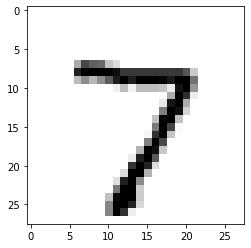

In [27]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()